In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [2]:
boston = load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
boston.data.shape

(506, 13)

In [8]:
boston.target   #Y값

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [9]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [10]:
import pandas as pd 
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['Y'] = boston.target
df.head()

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
### 데이터 분할 
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target
                                                    ,random_state=0)

In [12]:
### 모델링/학습 
lr = LinearRegression().fit(X_train, y_train)

In [13]:
### 평가 
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.7697699488741149, 0.6354638433202129)

In [14]:
lr.coef_

array([-1.17735289e-01,  4.40174969e-02, -5.76814314e-03,  2.39341594e+00,
       -1.55894211e+01,  3.76896770e+00, -7.03517828e-03, -1.43495641e+00,
        2.40081086e-01, -1.12972810e-02, -9.85546732e-01,  8.44443453e-03,
       -4.99116797e-01])

### 성능개선 

In [16]:
def load_extended_boston():
    boston = load_boston() 
    X = MinMaxScaler().fit_transform(boston.data)   #스케일 조정 , 0~1 변경
    P = PolynomialFeatures(degree=2, include_bias=False)
    X = P.fit_transform(X)
    print(P.get_feature_names())
    return X, boston.target 

In [17]:
X, y = load_extended_boston()

['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [18]:
### 데이터 분할 
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

### 모델링/학습 
lr = LinearRegression().fit(X_train, y_train)

### 평가 
lr.score(X_train, y_train), lr.score(X_test, y_test)    #오버피팅

(0.952051960903273, 0.6074721959665708)

In [22]:
### 김승한 반장님 질문 
import numpy as np 

x = np.arange(10).reshape(-1,1)
poly = PolynomialFeatures(degree=2, include_bias=True)
poly.fit_transform(x)

array([[ 1.,  0.,  0.],
       [ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.],
       [ 1.,  5., 25.],
       [ 1.,  6., 36.],
       [ 1.,  7., 49.],
       [ 1.,  8., 64.],
       [ 1.,  9., 81.]])

### Ridge 적용

In [25]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
ridge.score(X_train, y_train), ridge.score(X_test, y_test)

(0.885796658517094, 0.7527683481744755)

In [26]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
ridge10.score(X_train, y_train), ridge10.score(X_test, y_test)

(0.7882787115369614, 0.635941148917731)

In [27]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
ridge01.score(X_train, y_train), ridge01.score(X_test, y_test)

(0.9282273685001985, 0.772206793647982)

In [36]:
lr.coef_.shape

(104,)

In [37]:
ridge.coef_.shape

(104,)

In [38]:
ridge10.coef_.shape

(104,)

In [ ]:
ridge01.coef_

### W값을 시각화 

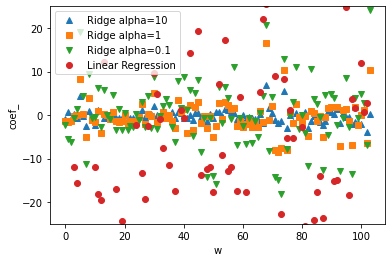

In [35]:
import matplotlib.pyplot as plt 

plt.plot(ridge10.coef_, '^', label='Ridge alpha=10')
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge01.coef_, 'v', label='Ridge alpha=0.1')
plt.plot(lr.coef_, 'o', label='Linear Regression')

plt.ylim(-25, 25)
plt.legend()
plt.xlabel('w')
plt.ylabel('coef_')
plt.show()

### Lasso 적용 

In [40]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
lasso.score(X_train, y_train), lasso.score(X_test, y_test)

(0.29323768991114607, 0.20937503255272294)

In [43]:
### 0이 아닌 w가 몇개가 있는지? 

np.sum(lasso.coef_ != 0)

4

In [46]:
lasso001 = Lasso(alpha=0.01, max_iter=10000).fit(X_train, y_train)
lasso001.score(X_train, y_train), lasso001.score(X_test, y_test)

(0.8962226511086497, 0.7656571174549983)

In [47]:
np.sum(lasso001.coef_ != 0)

33

In [49]:
lasso0001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
lasso0001.score(X_train, y_train), lasso0001.score(X_test, y_test)

(0.9507158754515467, 0.6437467421272709)

In [50]:
np.sum(lasso0001.coef_ != 0)

96

### ElasticNet

In [57]:
from sklearn.linear_model import ElasticNet, ElasticNetCV 
en = ElasticNet().fit(X_train, y_train)
en.score(X_train,y_train), en.score(X_test, y_test)

(0.32837814485847916, 0.2217004367773664)

In [56]:
en = ElasticNet(alpha=0.01, l1_ratio=0.5).fit(X_train, y_train)
en.score(X_train,y_train), en.score(X_test, y_test)

(0.8553665697077995, 0.7209054027265391)

In [59]:
en = ElasticNetCV(max_iter=10000).fit(X_train, y_train)
en.score(X_train,y_train), en.score(X_test, y_test)

(0.8943718420442007, 0.7606847857028749)

In [60]:
en.alpha_

0.0032952216582695813

In [61]:
en.l1_ratio_

0.5

In [62]:
import sklearn
sklearn.__version__

'0.23.1'

In [64]:
en.coef_.shape

(104,)